In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Birds
Classificate [Caltech birds dataset](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html)

# Get data

In [1]:
from fastai.datasets import URLs, untar_data

data_path = untar_data(URLs.CUB_200_2011)
images_path = data_path/'images'

# Copy-paste classification from lesson 1 fast.ai

In [0]:
from fastai.vision import get_image_files
image_files = list()
for folder in images_path.ls(): 
  image_files += get_image_files(folder)
image_files[0]

PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0043_25847.jpg')

In [0]:
pattern = r'images/\d+\.(\w+)/'

In [0]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
data = ImageDataBunch.from_name_re(images_path, image_files, pattern, ds_tfms=get_transforms(), size=299, bs=32
                                  ).normalize(imagenet_stats)

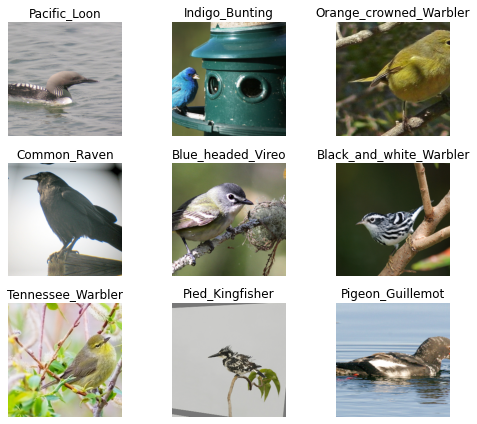

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)

['Acadian_Flycatcher', 'American_Crow', 'American_Goldfinch', 'American_Pipit', 'American_Redstart', 'American_Three_toed_Woodpecker', 'Anna_Hummingbird', 'Artic_Tern', 'Baird_Sparrow', 'Baltimore_Oriole', 'Bank_Swallow', 'Barn_Swallow', 'Bay_breasted_Warbler', 'Belted_Kingfisher', 'Bewick_Wren', 'Black_Tern', 'Black_and_white_Warbler', 'Black_billed_Cuckoo', 'Black_capped_Vireo', 'Black_footed_Albatross', 'Black_throated_Blue_Warbler', 'Black_throated_Sparrow', 'Blue_Grosbeak', 'Blue_Jay', 'Blue_headed_Vireo', 'Blue_winged_Warbler', 'Boat_tailed_Grackle', 'Bobolink', 'Bohemian_Waxwing', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Brewer_Sparrow', 'Bronzed_Cowbird', 'Brown_Creeper', 'Brown_Pelican', 'Brown_Thrasher', 'Cactus_Wren', 'California_Gull', 'Canada_Warbler', 'Cape_Glossy_Starling', 'Cape_May_Warbler', 'Cardinal', 'Carolina_Wren', 'Caspian_Tern', 'Cedar_Waxwing', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Chipping_Sparrow', 'Chuck_will_Widow', 'Clark_Nutcracker', 'Clay_colore

In [0]:
from fastai.vision import cnn_learner, models
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(10)

In [0]:
learn.save('stage-1')

In [0]:
from fastai.vision import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
import re 
from collections import Counter

print(len(data.classes))
some_classes = list()
for c in data.classes:
  m = re.match(r'.*(Swallow|Raven|Sparrow|Tern)', c)
  if m is not None:
    some_classes.append(m.group(1))
print(Counter(some_classes))

200
Counter({'Sparrow': 21, 'Tern': 7, 'Swallow': 4, 'Raven': 2})


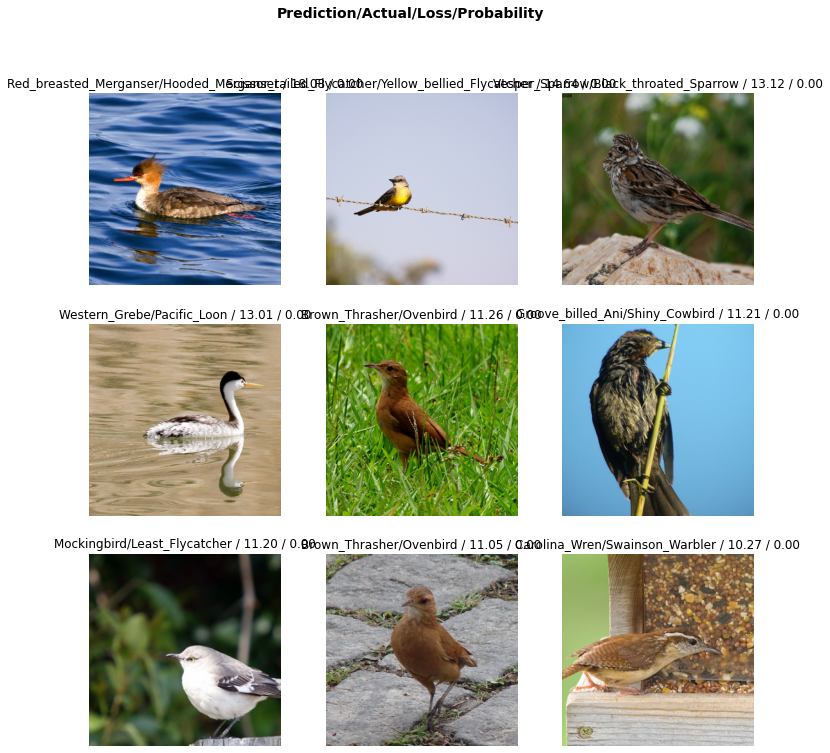

In [0]:
interp.plot_top_losses(9)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


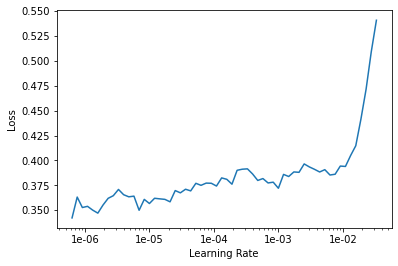

In [0]:
learn.recorder.plot()

In [0]:
'''
Первый вызов fit_one_cycle работал на предобученной модели и на самом деле обучал только несколько последних слоев
После вызовы unfreeze вся модель будет обучаться заново
'''
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

In [0]:
!ls /root/.fastai/

config.yml  data


In [0]:
learn.load('first_attempt')

In [0]:
# Поэтому загружаем предобученную модель и учим с посчитанным lerning rate
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

# Reduce number of classes

Я собираюсь попробовать классифицировать не все 200 классов, а объединить классы в более общие (воробей, ласточка, ворон).
Это нужно
1. v0 которую можно будет уже деплоить
2. просто проверить, как это будет работать


In [0]:
print(images_path.ls()[0])
print(images_path.ls()[0].ls())

/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow
[PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0043_25847.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0035_26081.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0032_26014.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0025_25893.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0017_26127.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0085_25919.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0012_25946.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0024_26064.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0016_25854.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0073_25977.jpg'), PosixPath('/root/.fastai/d

In [0]:
images_path.ls()

In [0]:
def get_labels(s):
  n = s.parts[-2] # Это название папки
  n = n.split('.')[-1] # Убираем цифру в названии
  spl = n.split('_')
  if len(spl) == 1:
    return spl[0]
  else:
    return spl[-1]
  

In [0]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
reduced_data = ImageDataBunch.from_name_func(images_path, image_files, get_labels, ds_tfms=get_transforms(), size=299, bs=32
                                  ).normalize(imagenet_stats)

In [0]:
len(data.classes), data.c

(70, 70)

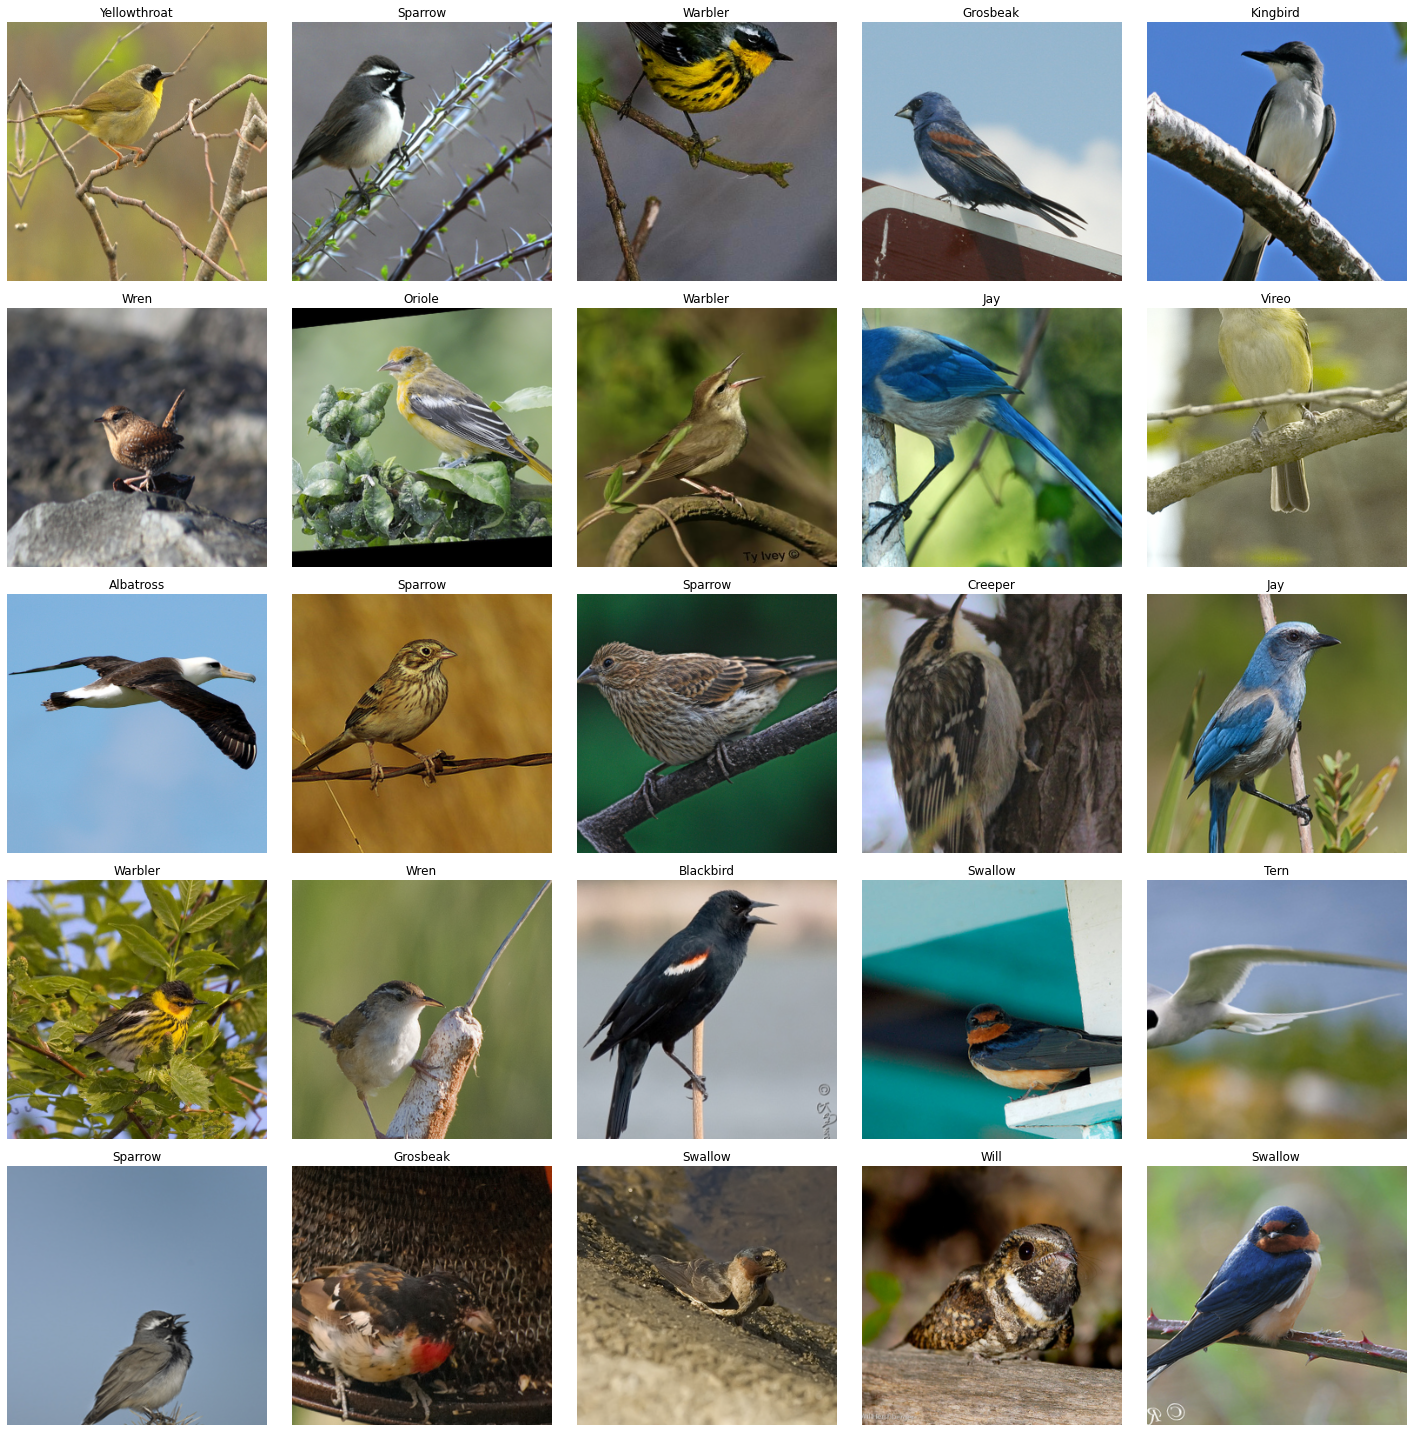

In [0]:
reduced_data.show_batch()

In [0]:
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet50
from fastai.metrics import error_rate
small_learn = cnn_learner(reduced_data, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
small_learn.fit_one_cycle(10)

In [0]:
small_learn.fit_one_cycle(2)

In [0]:
small_learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


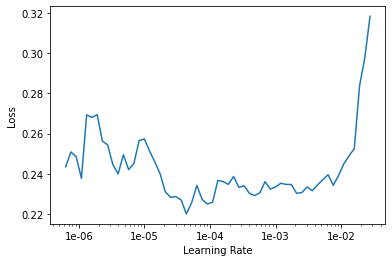

In [0]:
small_learn.recorder.plot()

In [0]:
small_learn.fit_one_cycle(10, max_lr=slice(5e-05, 1e-04))

# Create local data
1. Сам разбиваю датасет на train/validation так, чтобы для каждого класса было одинаковое количество изображений и там, и там
2. Обрезаю изображения по координатам, которые есть в доп материалах к датасету 

*Обучать буду сразу resnet101 так как она дала самый лучший резльтат до обрезки (не сохранил ноутбук с этим этапом, там ошибка была около 6)*


In [0]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
from pathlib import Path

In [0]:
! python img_cropper.py --ids_file {data_path}/images.txt --data_path {images_path} --bb_file {data_path}/bounding_boxes.txt

In [0]:
! python data_mover.py --data_path {images_path} --dest ./images --validation_size 20

In [0]:
local_data = ImageDataBunch.from_folder(Path('./images'), ds_tfms=get_transforms(), valid='validation', size=299, bs=32).normalize(imagenet_stats)
# Попробую без transforms
# local_data = ImageDataBunch.from_folder(Path('./images'), ds_tfms=None, valid='validation', size=299, bs=32).normalize(imagenet_stats)
# То же самое получается

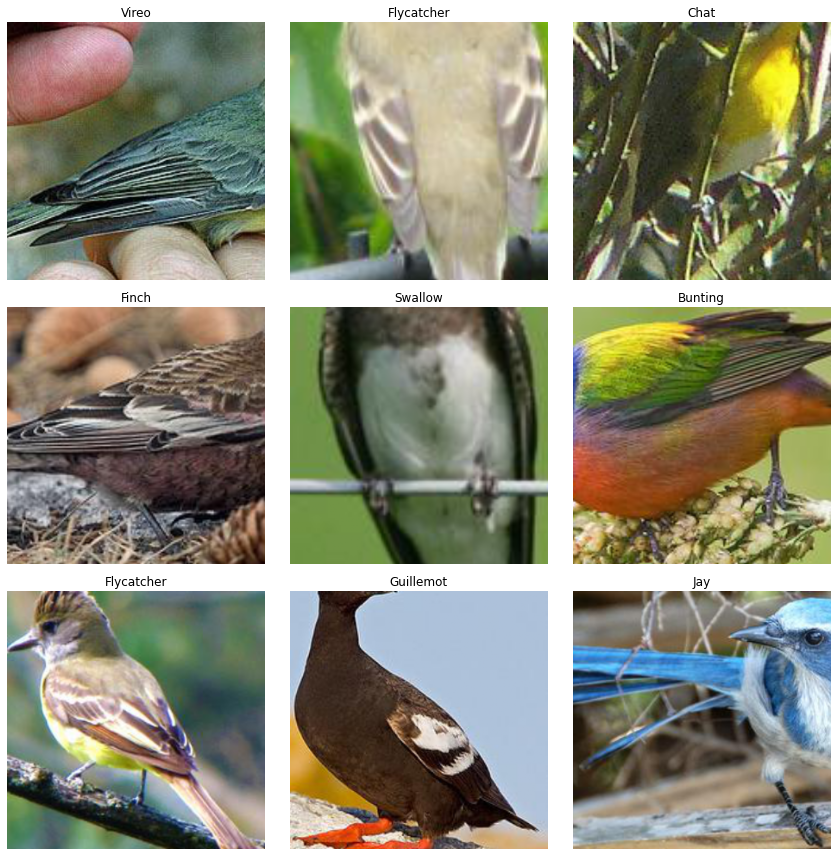

In [7]:
local_data.show_batch(rows=3)

In [0]:
from fastai.vision import cnn_learner, models
from fastai.metrics import error_rate

In [0]:
local_learner = cnn_learner(local_data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [0]:
local_learner.fit_one_cycle(5)

In [0]:
local_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


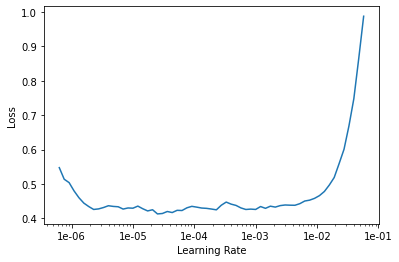

In [0]:
local_learner.recorder.plot()

In [0]:
local_learner.fit_one_cycle(7, max_lr=slice(2e-05, 8e-05))

# Clean up

In [0]:
! rm -rf {data_path}
! rm -rf images

data_path = untar_data(URLs.CUB_200_2011)
images_path = data_path/'images'

# ResNet101

Без обрезания для референса  
Также уменьшу на 5% количество картинок для валидации

15% на валидацию дали хуже результат, оставляю с 20.

In [0]:
! python data_mover.py --data_path {images_path} --dest ./images --validation_size 20

In [0]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
local_data = ImageDataBunch.from_folder(Path('./images'), ds_tfms=get_transforms(), valid='validation', size=299, bs=32).normalize(imagenet_stats)

In [0]:
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet101
from fastai.metrics import error_rate
local_learner = cnn_learner(local_data, resnet101, metrics=error_rate)

In [6]:
local_learner.fit_one_cycle(5)

RuntimeError: ignored

In [0]:
local_learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


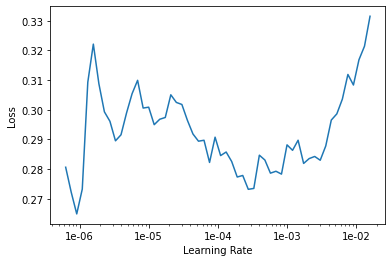

In [0]:
local_learner.recorder.plot()

In [0]:
local_learner.fit_one_cycle(7, max_lr=slice(1e-04, 5e-04))